In [6]:
import numpy as np
import pandas as pd
from collections import Counter
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [24]:
#results
results_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/results.csv'
results_df = pd.read_csv(results_url, sep = ',', engine = 'python')
results_df.head()

#status
status_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/status.csv'
status_df = pd.read_csv(status_url, sep = ',', engine = 'python')

#circuits
circuits_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/circuits.csv'
circuits_df = pd.read_csv(circuits_url, sep = ',', encoding = 'latin-1')

#races
races_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/races.csv'
races_df = pd.read_csv(races_url, sep = ',', engine = 'c')

#Drivers
drivers_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/drivers.csv'
drivers_df = pd.read_csv(drivers_url, sep = ',', encoding = 'latin-1')

#lap Times
lap_times_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/lap_times.csv'
lap_times_df = pd.read_csv(lap_times_url, sep = ',', engine = 'python')

#MasterData5
MasterData5_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/MasterData5.csv'
MasterData5_df = pd.read_csv(MasterData5_url, sep = ',', engine = 'python')

#races-v4
race_weather_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/interim/races-v4.csv'
race_weather_df = pd.read_csv(race_weather_url, sep = ',', engine = 'python')

#MasterData5-oneHot
Master5_oneHot_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/OneHot_MasterData5.csv'
Master5_oneHot_df = pd.read_csv(Master5_oneHot_url, sep = ',', engine = 'python')

In [34]:
MasterData5_df.head(5)

,raceId,driverId,constructorId,grid,position,positionText,positionOrder,laps,fastestLap,rank,...,nationality,total_lap_time,average_lap_time,minimum_lap_time,PRCP,TAVG,TMAX,TMIN,bundled_circuitId,binned_circuits
0,1,1,1,18,NaN,D,20,58,39.0,13.0,...,British,5658698,97563.758621,89020,0.0,72.0,78.0,66.0,0,Tier2
1,1,2,2,9,10.0,10,10,58,48.0,5.0,...,German,5662869,97635.672414,88283,0.0,72.0,78.0,66.0,0,Tier2
2,1,3,3,5,6.0,6,6,58,48.0,1.0,...,German,5661506,97612.172414,87706,0.0,72.0,78.0,66.0,0,Tier2
3,1,4,4,10,5.0,5,5,58,53.0,9.0,...,Spanish,5660663,97597.637931,88712,0.0,72.0,78.0,66.0,0,Tier2
4,1,6,3,11,NaN,R,18,17,6.0,18.0,...,Japanese,1560978,91822.235294,89923,0.0,72.0,78.0,66.0,0,Tier2


In [25]:
corr = Master5_oneHot_df.corr()

<AxesSubplot:>

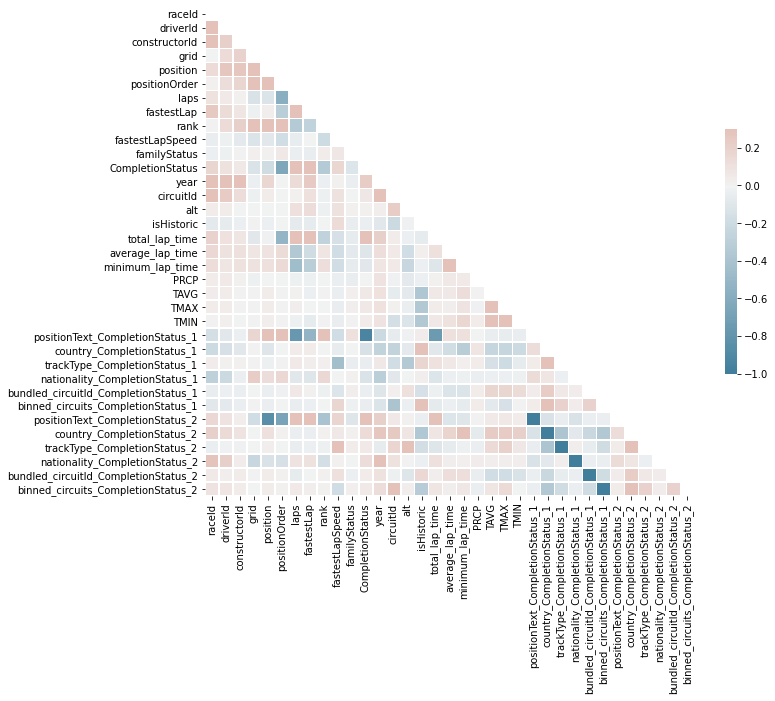

In [26]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,25))

#everything
total = MasterData5_df.groupby('constructorId')['familyStatus'].sum().reset_index()

#Binning
Success = MasterData5_df[MasterData5_df.familyStatus=='4']
VehicleFailure = MasterData5_df[MasterData5_df.familyStatus=='6']
TyreFailure = MasterData5_df[MasterData5_df.familyStatus=='5']
Collision = MasterData5_df[MasterData5_df.familyStatus=='2']
Accident = MasterData5_df[MasterData5_df.familyStatus=='1']

print(Success)
#Car Success (4)
SuccessBar = sns.barplot(x='constructorId', y='familyStatus', data=Success, estimator = sum, ci = None, color='darkgreen')
#Vehicle Failure (6)
VehicleFailureBar = sns.barplot(x='constructorId', y='familyStatus', data=VehicleFailure, estimator = sum, ci = None, color='lighblue')
#Tyre Failure (5)
TyreFailureBar = sns.barplot(x='constructorId', y='familyStatus', data=TyreFailure, estimator = sum, ci = None, color='lightgreen')
#Collision (2)
CollisionBar = sns.barplot(x='constructorId', y='familyStatus', data=Collision, estimator = sum, ci = None, color='darkred')
#Accident (1)
AccidentBar = sns.barplot(x='constructorId', y='familyStatus', data=Accident, estimator = sum, ci = None, color='lightred')


Empty DataFrame
Columns: [raceId, driverId, constructorId, grid, position, positionText, positionOrder, laps, fastestLap, rank, fastestLapSpeed, familyStatus, Completion Status, year, circuitId, country, alt, isHistoric, trackType, nationality, total_lap_time, average_lap_time, minimum_lap_time, PRCP, TAVG, TMAX, TMIN, bundled_circuitId, binned_circuits]
Index: []

[0 rows x 29 columns]


ValueError: min() arg is an empty sequence

<Figure size 1800x1800 with 0 Axes>